In [3]:
%%bash
conda env list

# conda environments:
#
base                  *  /opt/conda
jupyterlab               /opt/conda/envs/jupyterlab
prolig_0001              /opt/conda/envs/prolig_0001
pytorch                  /opt/conda/envs/pytorch
tensorflow               /opt/conda/envs/tensorflow



In [2]:
def readGenome(filename):
    genome = ''
    with open(filename, 'r') as f:
        for line in f:
            # ignore header line with genome information
            if not line[0] == '>':
                genome += line.rstrip()
    return genome


In [2]:
def readFastq(filename):
    sequences = []
    qualities = []
    with open(filename) as fh:
        while True:
            fh.readline()  # skip name line
            seq = fh.readline().rstrip()  # read base sequence
            fh.readline()  # skip placeholder line
            qual = fh.readline().rstrip() # base quality line
            if len(seq) == 0:
                break
            sequences.append(seq)
            qualities.append(qual)
    return sequences, qualities


In [51]:
def reverseComplement(s):
    complement = {'A': 'T', 'C': 'G', 'G': 'C', 'T': 'A', 'N': 'N'}
    t = ''
    for base in s:
        t = complement[base] + t
    return t


In [49]:
def naive(p, t):
    occurrences = []
    for i in range(len(t) - len(p) + 1):  # loop over alignments
        match = True
        for j in range(len(p)):  # loop over characters
            if t[i+j] != p[j]:  # compare characters
                match = False
                break
        if match:
            occurrences.append(i)  # all chars matched; record
    return occurrences


In [50]:
def naive_with_rc(p, t):
    occurrences = []
    if reverseComplement(p) != p:
        occurrences = naive(reverseComplement(p), t)
    return occurrencesAGGT


In [47]:
!wget --no-check https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/lambda_virus.fa
    

--2019-11-11 12:56:05--  https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/lambda_virus.fa
Resolving d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)... 13.35.112.183, 13.35.112.73, 13.35.112.141, ...
Connecting to d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)|13.35.112.183|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 49270 (48K) [application/octet-stream]
Saving to: ‘lambda_virus.fa.1’

lambda_virus.fa.1   100%[===================>]  48.12K  --.-KB/s    in 0.06s   

2019-11-11 12:56:06 (874 KB/s) - ‘lambda_virus.fa.1’ saved [49270/49270]



In [52]:
# Q2: How many times does AGGT or its reverse complement (ACCTACCT) occur in the lambda virus genome?
t = readGenome('lambda_virus.fa.1')
p = 'AGGT'

occurences = naive(p, t)
occurencesReverse = naive_with_rc(p, t)

print(len(occurences) + len(occurencesReverse))


306


In [53]:
# Q2: How many times does TTAA or its reverse complement (TTAA) occur in the lambda virus genome?
t = readGenome('lambda_virus.fa')
p = 'TTAA'

occurences = naive(p, t)
occurencesReverse = naive_with_rc(p, t)
print(occurences, '\n', occurencesReverse)

print(len(occurences) + len(occurencesReverse))


[46, 77, 90, 732, 1455, 2175, 3274, 3418, 4348, 4463, 5267, 5708, 6075, 6183, 6540, 7026, 7948, 8061, 8199, 8460, 9078, 9252, 9691, 9951, 11082, 11115, 11517, 11583, 12618, 12966, 14107, 14991, 15627, 15967, 16033, 16294, 16858, 18868, 19136, 19481, 20799, 21440, 21634, 21701, 21902, 21947, 22723, 23047, 23083, 23110, 23205, 23278, 23284, 23478, 23497, 23554, 23692, 23886, 23978, 23986, 24072, 24101, 24750, 24986, 25169, 25254, 25352, 25436, 25577, 25745, 25967, 26132, 26425, 26450, 26482, 26522, 26584, 26650, 26665, 26678, 26692, 26762, 26809, 26983, 26992, 27037, 27091, 27202, 27316, 27682, 28455, 28568, 28921, 28971, 29373, 29980, 30381, 30619, 30638, 30721, 30734, 30755, 31168, 31807, 32193, 32217, 32640, 32703, 33221, 33350, 33687, 33735, 33747, 33800, 34201, 34365, 34405, 34589, 34617, 34686, 34734, 34752, 34830, 35061, 35259, 35533, 35540, 36274, 36281, 36302, 36429, 36491, 36530, 36542, 36603, 36735, 36756, 36878, 37031, 37441, 37765, 37782, 37881, 37915, 37943, 38163, 38286, 3

In [15]:
#Q3: What is the offset of the leftmost occurrence of ACTAAGT or its reverse complement
t = readGenome('lambda_virus.fa')
p = 'ACTAAGT'

occurences = naive(p, t)
occurencesReverse = naive_with_rc(p, t)
print(occurences, '\n', occurencesReverse)

print(min(occurences[0], occurencesReverse[0]))




[27733, 45382] 
 [26028]
26028


In [54]:
#Q4: What is the offset of the leftmost occurrence of AGTCGA or its reverse complement
t = readGenome('lambda_virus.fa')
p = 'AGTCGA'

occurences = naive(p, t)
occurencesReverse = naive_with_rc(p, t)
print(occurences, '\n', occurencesReverse)

print(min(occurences[0], occurencesReverse[0]))


[18005, 23320, 33657, 44806] 
 [450, 1908, 2472, 41927, 45369]
450


In [66]:
#Q5 make naive_2mm that allows up to 2 mismatches per occurrence
def naive_2mm(p, t):
    occurrences = []
    for i in range(len(t) - len(p) + 1):  # loop over alignments
        match = True
        mms = 0
        for j in range(len(p)):  # loop over characters
            if t[i+j] != p[j]:  # compare characters
                mms += 1
            if mms > 2:
                match = False
                break
        if match:
            occurrences.append(i)  # all chars matched; record
    return occurrences


In [68]:
p = 'TTCAAGCC'
t = readGenome('lambda_virus.fa.1')
print(len(naive_2mm(p, t)))


191


In [70]:
'''What is the offset of the leftmost occurrence of AGGAGGTT 
in the Lambda virus genome when allowing up to 2 mismatches?'''

p = 'AGGAGGTT'
t = readGenome('lambda_virus.fa.1')
occurrences = naive_2mm(p, t)
print(min(occurrences))


49


In [23]:
#Q7:

!wget --no-check https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/ERR037900_1.first1000.fastq
    

--2019-11-11 12:19:52--  https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/ERR037900_1.first1000.fastq
Resolving d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)... 13.226.52.155, 13.226.52.106, 13.226.52.168, ...
Connecting to d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)|13.226.52.155|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 241626 (236K) [application/octet-stream]
Saving to: ‘ERR037900_1.first1000.fastq’

ERR037900_1.first10 100%[===================>] 235.96K  --.-KB/s    in 0.1s    

2019-11-11 12:19:53 (1.96 MB/s) - ‘ERR037900_1.first1000.fastq’ saved [241626/241626]



In [34]:
seqs, quals = readFastq('ERR037900_1.first1000.fastq')
print(quals[:10])


['HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHGFHHHFHFFHHHHHGHHFHEH@4#55554455HGFBF<@C>7EEF@FBEDDD<=C<E', 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHCHHHHEHHBA#C>@54455C/7=CGHEGEB;C############', 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHGHHHHHHHHHHHHHDHHHDEHHHHFGIHEHEGGGF4#45655366GIGEHAGBG################', 'HHHHHHHHHHHHHHHHHHHHHHHHHIHHHHHHHHHHHHHHHHHHHHHHIHHHHHIHFHHHIHHHHD#ECA54655GGIBH?BD@+BCBF?5A=::>8?##', 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHIHIHEHHIGHIFFHIIGF6#555:2=7=CB;?3CAACBAC2B###########', 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHIHHHIHIHHHGH:#@@@@9@C@EEGCGGFIFFF9FCAF?EEE4B8>>', "HHHHHHHHHHHHHHHHHHHHHHIFHFEGGFHHHHHHGHHHHGHHHHHFHAFGHEHHIHHGBCCDC,#55564565CE:BB44+'5/36,(<<BC<DDBCE", 'HHFHHDHHHHDDGGGDHDHHHHHGHHHHHHHDHHECHHH8GGDEEHHHHEH?3HG<=4>555624/#5/55/555DADA#####################', 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHIHIIFIHEIIGFI@#==?46560GAAEDGGDGCA8CCB=@########', 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHEHHHGH@

In [35]:
# Convert the Phred33 score into quality score
def phred33ToQ(qual):
    return ord(qual)-33


In [43]:
def qualByPos(qualities):
    quals = [0]*100
    
    for qual in qualities:
        n = 0
        for phred in qual:
            quals[n] += phred33ToQ(phred)
            n += 1
                
    return quals


In [44]:
h = qualByPos(quals)
print(h)


[38435, 38460, 38400, 38428, 38417, 38382, 38362, 38364, 38325, 38343, 38194, 38154, 38089, 38152, 38153, 38099, 38055, 38041, 38067, 38150, 38087, 37989, 38009, 37909, 38028, 37576, 37514, 37503, 37578, 37552, 37629, 37555, 37548, 37433, 37402, 37343, 37198, 37126, 37158, 36904, 36742, 36677, 36645, 36493, 36509, 36375, 36205, 35974, 35847, 35673, 34832, 34739, 34399, 34402, 34025, 33025, 32882, 32741, 32573, 32224, 30805, 30666, 30343, 30131, 29463, 17891, 4526, 17881, 17865, 17852, 17466, 17131, 17134, 17098, 16852, 23745, 23958, 23221, 22902, 22366, 20904, 20584, 20383, 19767, 19095, 18061, 17757, 17152, 16972, 16286, 14811, 14679, 14310, 14152, 13734, 12538, 12278, 12179, 11676, 11561]


In [46]:
for i in range(len(h)):
    if h[i] == min(h):
        print(i)
        
        

66


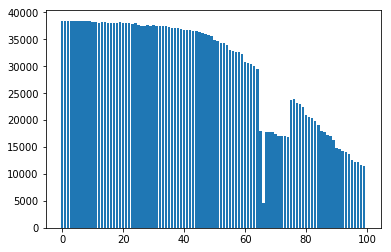

In [45]:
# tell mat plot lib to put the plot in this place
%matplotlib inline
import matplotlib.pyplot as plt
plt.bar(range(len(h)), h) # plot bar chart with x, y values in brackets
plt.show() # to display the plot


